In [ ]:
#Komail AL-Basri - 221437471
#ALI AL DIWANI - 221403599

In [ ]:
Load and Inspect the Data

In [7]:
import pandas as pd


file_path = r"C:\Users\Komail AL-Basri\Desktop\Data_Science\project\archive\Car_sales.csv"
car_sales_data = pd.read_csv(file_path)


print(car_sales_data.head())
print(car_sales_data.info())


  Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       CL              14.114               18.225    Passenger   
3        Acura       RL               8.588               29.725    Passenger   
4         Audi       A4              20.397               22.255    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8       140.0      101.2   67.3   172.4   
1               28.40          3.2       225.0      108.1   70.3   192.9   
2                 NaN          3.2       225.0      106.9   70.6   192.0   
3               42.00          3.5       210.0      114.6   71.4   196.6   
4               23.99          1.8       150.0      102.6   68.2   178.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency Latest_La

In [ ]:
Handle Missing Data

In [67]:
for column in car_sales_data.select_dtypes(include=['float64', 'int64']).columns:
    car_sales_data[column] = car_sales_data[column].fillna(car_sales_data[column].median())

for column in car_sales_data.select_dtypes(include=['object']).columns:
    car_sales_data[column] = car_sales_data[column].fillna(car_sales_data[column].mode()[0])

print(car_sales_data.isnull().sum())


Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64


In [ ]:
Handle Outliers

In [9]:
Q1 = car_sales_data['Price_in_thousands'].quantile(0.25)
Q3 = car_sales_data['Price_in_thousands'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

car_sales_data = car_sales_data[(car_sales_data['Price_in_thousands'] >= lower_bound) &
                                (car_sales_data['Price_in_thousands'] <= upper_bound)]

print("Data shape after outlier removal:", car_sales_data.shape)


Data shape after outlier removal: (146, 16)


In [ ]:
Descriptive Statistics

In [29]:
print(car_sales_data.describe())


       Sales_in_thousands  __year_resale_value  Price_in_thousands  \
count          157.000000           157.000000          157.000000   
mean            52.998076            17.180318           27.332261   
std             68.029422            10.178562           14.268713   
min              0.110000             5.160000            9.235000   
25%             14.114000            12.545000           18.145000   
50%             29.450000            14.180000           22.799000   
75%             67.956000            18.140000           31.930000   
max            540.561000            67.550000           85.500000   

       Engine_size  Horsepower   Wheelbase       Width      Length  \
count   157.000000  157.000000  157.000000  157.000000  157.000000   
mean      3.060510  185.894904  107.484076   71.146178  187.347134   
std       1.041311   56.522319    7.616872    3.441124   13.388708   
min       1.000000   55.000000   92.600000   62.600000  149.400000   
25%       2.300000 

In [ ]:
Identify Outliers (Using IQR for Price)

In [35]:
Q1 = car_sales_data['Price_in_thousands'].quantile(0.25)
Q3 = car_sales_data['Price_in_thousands'].quantile(0.75)
IQR = Q3 - Q1
outliers = car_sales_data[(car_sales_data['Price_in_thousands'] < (Q1 - 1.5 * IQR)) | (car_sales_data['Price_in_thousands'] > (Q3 + 1.5 * IQR))]
print("Number of outliers:", outliers.shape[0])


Number of outliers: 9


In [ ]:
Encode Categorical Variables

In [23]:

car_sales_data_encoded = pd.get_dummies(car_sales_data, drop_first=True)
print(car_sales_data_encoded.head())


X = car_sales_data_encoded.drop(columns=['Price_in_thousands'])
y = car_sales_data_encoded['Price_in_thousands']


   Sales_in_thousands  __year_resale_value  Price_in_thousands  Engine_size  \
0              16.919               16.360               21.50          1.8   
1              39.384               19.875               28.40          3.2   
3               8.588               29.725               42.00          3.5   
4              20.397               22.255               23.99          1.8   
5              18.780               23.555               33.95          2.8   

   Horsepower  Wheelbase  Width  Length  Curb_weight  Fuel_capacity  ...  \
0       140.0      101.2   67.3   172.4        2.639           13.2  ...   
1       225.0      108.1   70.3   192.9        3.517           17.2  ...   
3       210.0      114.6   71.4   196.6        3.850           18.0  ...   
4       150.0      102.6   68.2   178.0        2.998           16.4  ...   
5       200.0      108.7   76.1   192.0        3.561           18.5  ...   

   Latest_Launch_9/1/2011  Latest_Launch_9/10/2012  Latest_Launch_9/

In [ ]:
Normalize Numeric Features (Mileage and Price)

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
car_sales_data[['Price_in_thousands', 'Fuel_efficiency']] = scaler.fit_transform(car_sales_data[['Price_in_thousands', 'Fuel_efficiency']])

print(car_sales_data[['Price_in_thousands', 'Fuel_efficiency']].head())


   Price_in_thousands  Fuel_efficiency
0            0.288636         0.433333
1            0.451015         0.333333
3            0.771068         0.233333
4            0.347234         0.400000
5            0.581625         0.233333


In [ ]:
 Split Data into Train and Test Sets

In [59]:
from sklearn.model_selection import train_test_split


X = car_sales_data_encoded.drop(columns=['Price_in_thousands'])
y = car_sales_data_encoded['Price_in_thousands']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (116, 306)
Testing data shape: (30, 306)


In [ ]:
Histogram of Car Prices

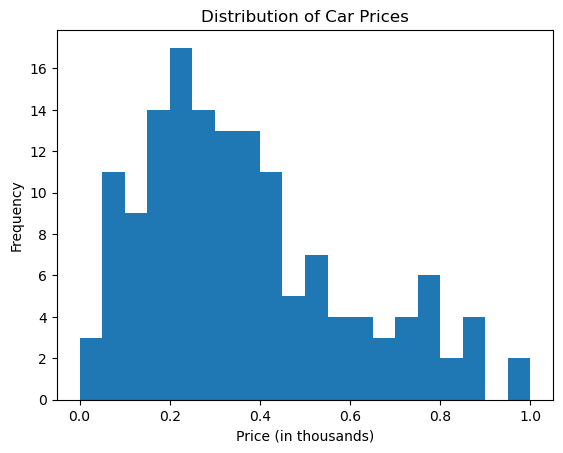

In [29]:
import matplotlib.pyplot as plt

plt.hist(car_sales_data['Price_in_thousands'], bins=20)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in thousands)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
Scatter Plot of Mileage vs. Price

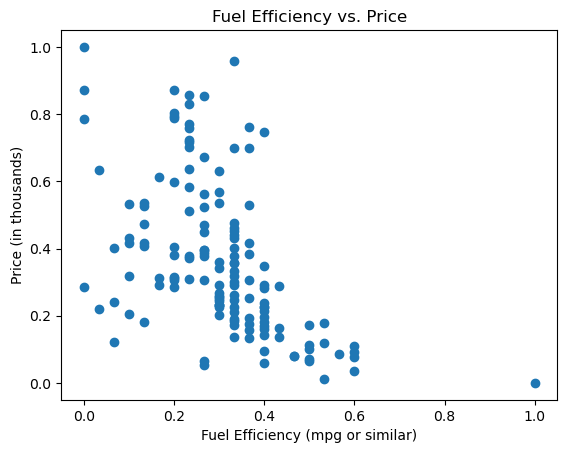

In [35]:
plt.scatter(car_sales_data['Fuel_efficiency'], car_sales_data['Price_in_thousands'])
plt.title('Fuel Efficiency vs. Price')
plt.xlabel('Fuel Efficiency (mpg or similar)')
plt.ylabel('Price (in thousands)')
plt.show()


In [ ]:
Box Plot of Prices by Car Make

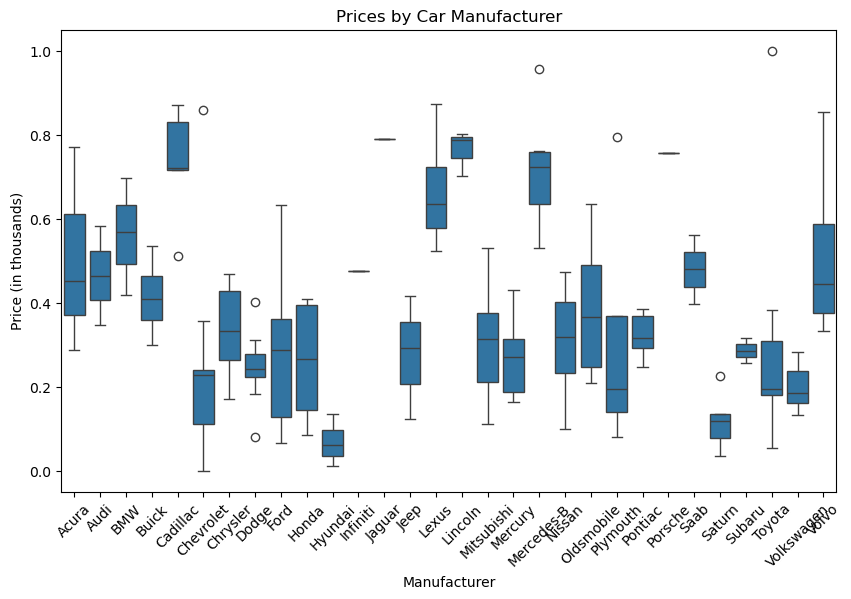

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Manufacturer', y='Price_in_thousands', data=car_sales_data)
plt.title('Prices by Car Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price (in thousands)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
Correlation Heatmap

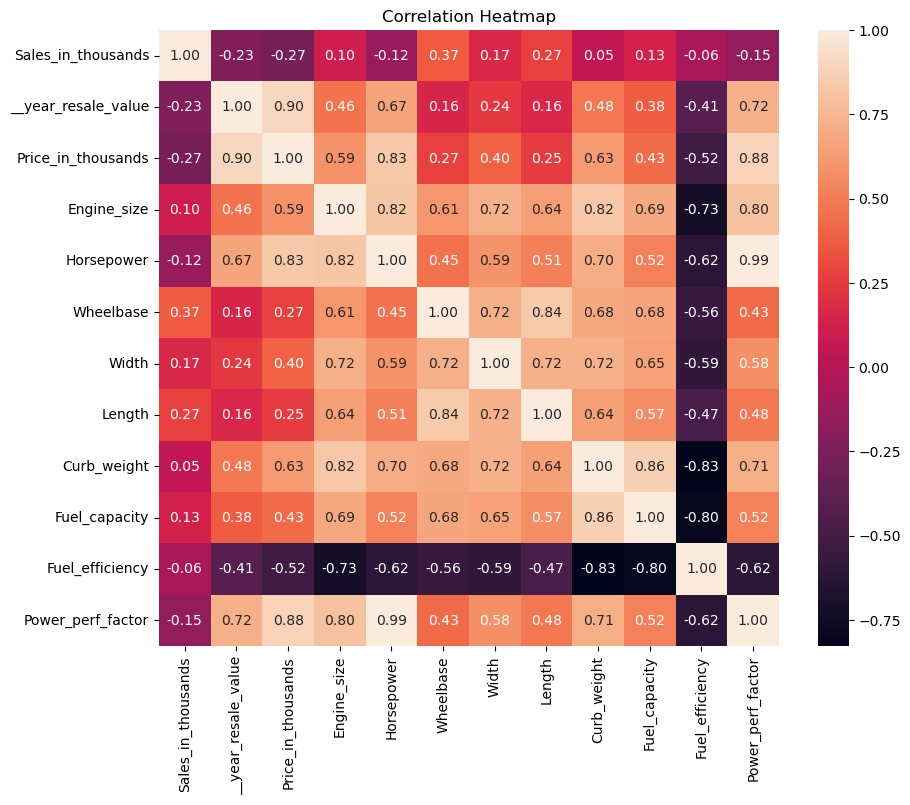

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(car_sales_data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
T-test (Comparing Prices Between Two Makes)

In [51]:
make1_prices = car_sales_data[car_sales_data['Manufacturer'] == 'Toyota']['Price_in_thousands']
make2_prices = car_sales_data[car_sales_data['Manufacturer'] == 'Ford']['Price_in_thousands']

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(make1_prices, make2_prices, nan_policy='omit')
print("T-test results: t-statistic =", t_stat, ", p-value =", p_value)


T-test results: t-statistic = 0.20792494474140336 , p-value = 0.8376220222504163


In [ ]:
Split Data into Train and Test Sets

In [41]:
from sklearn.model_selection import train_test_split


X = car_sales_data_encoded.drop(columns=['Price_in_thousands'])
y = car_sales_data_encoded['Price_in_thousands']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (116, 306)
Testing data shape: (30, 306)


In [ ]:
Train Machine Learning Models

In [69]:

X_train = X_train.fillna(X_train.median())  # Replace NaN with median values
X_test = X_test.fillna(X_test.median())


from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print(f"R²: {r2_score(y_test, predictions):.4f}")
    print(f"MSE: {mean_squared_error(y_test, predictions):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, predictions):.4f}")
    print("-" * 30)

evaluate_model(y_test, lr_predictions, "Linear Regression")


Model: Linear Regression
R²: 1.0000
MSE: 0.0026
MAE: 0.0368
------------------------------


In [ ]:
Evaluate Models

In [91]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)


dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)


rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print(f"R²: {r2_score(y_test, predictions):.4f}")
    print(f"MSE: {mean_squared_error(y_test, predictions):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, predictions):.4f}")
    print("-" * 30)


evaluate_model(y_test, lr_predictions, "Linear Regression")
evaluate_model(y_test, dt_predictions, "Decision Tree")
evaluate_model(y_test, rf_predictions, "Random Forest")


Model: Linear Regression
R²: 1.0000
MSE: 0.0026
MAE: 0.0368
------------------------------
Model: Decision Tree
R²: 0.3687
MSE: 36.6968
MAE: 4.3522
------------------------------
Model: Random Forest
R²: 0.5624
MSE: 25.4409
MAE: 3.2462
------------------------------


In [ ]:
Feature Importance (Random Forest)

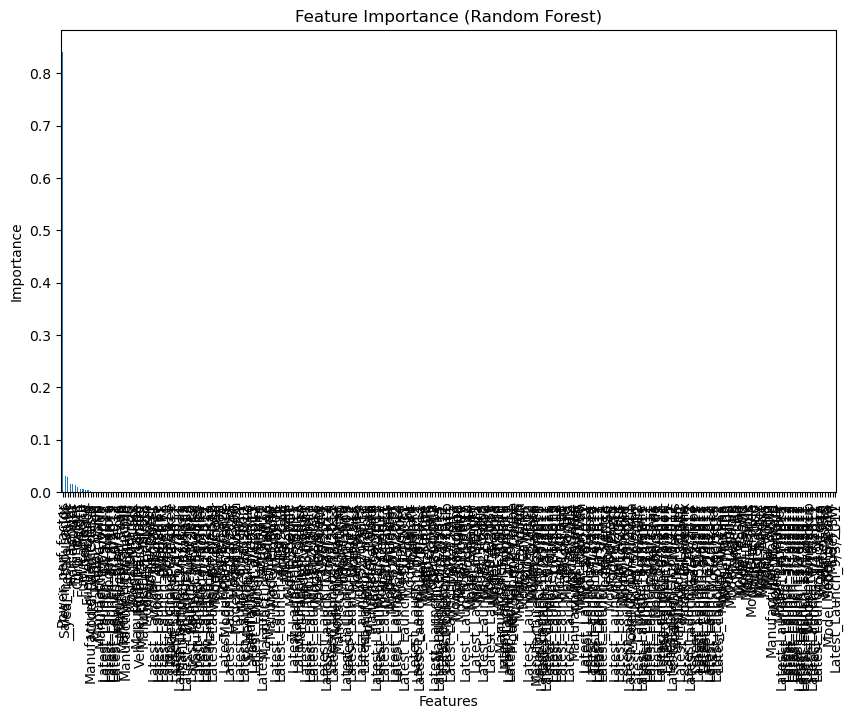

In [105]:
import matplotlib.pyplot as plt
import pandas as pd


feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [ ]:
Visualization of Predictions

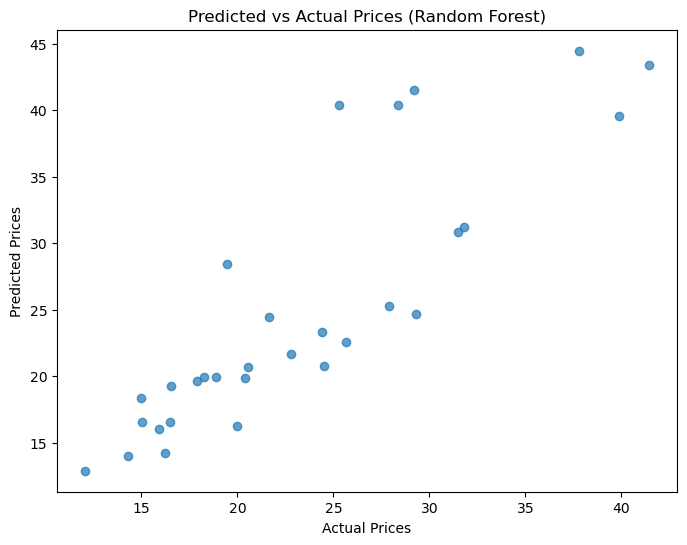

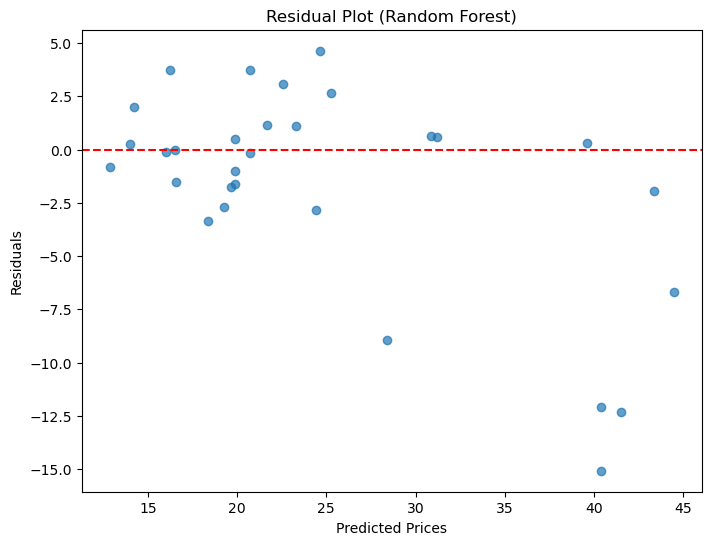

In [107]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.7)
plt.title('Predicted vs Actual Prices (Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

residuals = y_test - rf_predictions
plt.figure(figsize=(8, 6))
plt.scatter(rf_predictions, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()


In [ ]:
Model Comparison

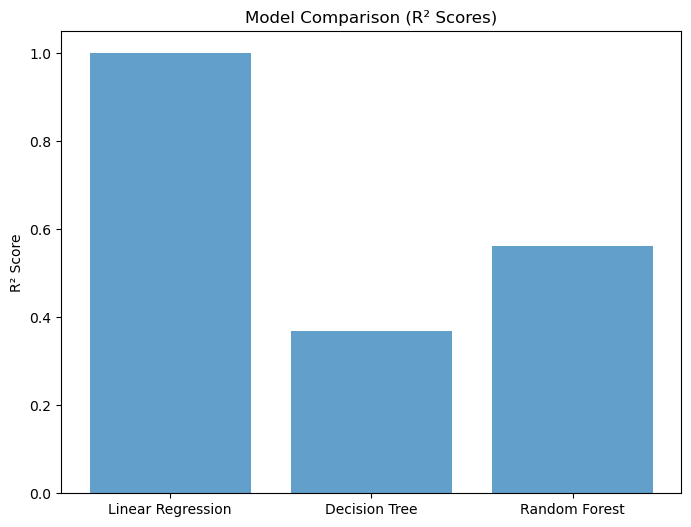

In [109]:

models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [r2_score(y_test, lr_predictions), 
             r2_score(y_test, dt_predictions), 
             r2_score(y_test, rf_predictions)]

plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, alpha=0.7)
plt.title('Model Comparison (R² Scores)')
plt.ylabel('R² Score')
plt.show()
